In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Q1: what are the j, l, x, and m in the fjHead? and how to generate them?



In [17]:
# According to the paper:

m = 8
l = 2
d = 3

Defining our sampled data.

In [2]:
# Solid lines
a = [-0.01097201305, -0.02819949502, -0.01753561254, 0.04431120359, 0.1459885419, 0.2422379845, 0.2301496146, 0.3940197759]


In [ ]:
fjHead = [0]

# How to define 'x'? Does this approach make sense?

for j in range (m):
  for x in range (m):
    fjHead[j] = np.square((np.sinc(np.pi*j*l*x)/m))

#How to generate our k-space?

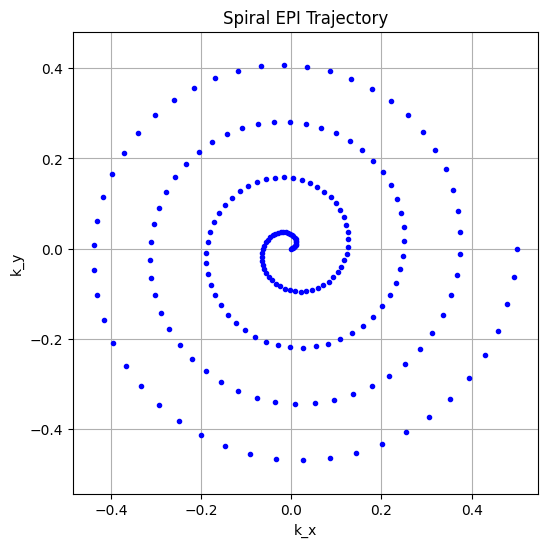

In [ ]:
# Parameters
num_points = 200  # Number of sampling points
r_max = 1.0  # Maximum radius of the spiral
theta_max = 8 * np.pi  # Maximum angular range
k_space_scaling = 0.5  # Scaling factor for k-space

# Generate the spiral trajectory
theta = np.linspace(0, theta_max, num_points)
r = np.linspace(0, r_max, num_points)
k_x = r * np.cos(theta) * k_space_scaling
k_y = r * np.sin(theta) * k_space_scaling

# Create a plot
plt.figure(figsize=(6, 6))
plt.title("Spiral EPI Trajectory")
plt.plot(k_x, k_y, 'b.')
plt.xlabel('k_x')
plt.ylabel('k_y')
plt.grid(True)

plt.axis('equal')  # Set equal scaling for x and y axes

# Display the trajectory
plt.show()

Kernel

# Does our kernel have something to do with guassian kernel?

In [ ]:
# Question: How to declare 'a'?
# Answer: 'a1,...,an' is our decision variables, which is defined in the first sections of this notebook.

# Question: How to declare 'f'?

f = []
for j in range (m):
  for x in range (m):
    if np.abs(x) < ((j * l) / m):
      f[j] = (np.square(m)/ (np.square(j) * np.square(l))) * np.abs(np.abs(x) - ((j * l) / m))
    else:
      f[j] = 0

# Does it make sense to use these for loops?


arr = []

# Kernel function
for j in range (m) :
  arr[j] = a[j] * f[j]
  f = np.sum(arr)

# With transfer function
for j in range (m) :
  arr[j] = a[j] * fHead[j]
  fHead = np.sum(arr)

Sampled Data

#Q2: How to generate our Signal 's', that we need to calculate its delta?

In [ ]:
# s: V -> C represent the signal we want to reconstruct.

# s =

# g : VHead -> C represent the Fourier transform of that signal

g = np.fft(s)

# note1: We need to generate 's' then calculate the delta of that
# note2: we sample 'g' at a finite set, G in VHead , of frequencies.

# Question: should 'g' bounds be the same with 's'? and what are the bounds of 's'?

gHead = np.sum(delta(s) * g)

What we want to do:

In [ ]:
# We need to calculate delta s.
# Question: Suppose we have generated 's'. What is the delta of 's'? Do we have specific points or that is just the difference between the min and the max?

reconstruct = np.ifft(f) * (np.convolve (np.ifft(np.sum(delta(s))), np.ifft(g)))